In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('gene_expression.xlsx')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


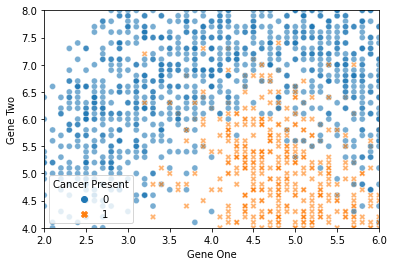

In [11]:
sns.scatterplot(data=df,x="Gene One",y='Gene Two', hue='Cancer Present',alpha=0.6,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)
plt.show()

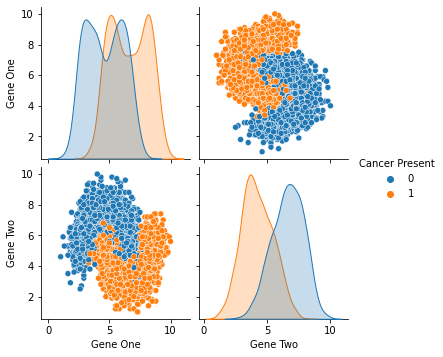

In [12]:
sns.pairplot(data=df,hue='Cancer Present')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X=df.drop('Cancer Present',axis=1)

In [18]:
y=df['Cancer Present']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
scaler=StandardScaler()

In [21]:
scaled_X_train=scaler.fit_transform(X_train)

In [22]:
scaled_X_test=scaler.fit_transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [25]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
y_prediction=knn_model.predict(scaled_X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
confusion_matrix(y_test,y_prediction)

array([[464,  46],
       [ 48, 432]], dtype=int64)

In [33]:
len(y_test)

990

In [34]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       510
           1       0.90      0.90      0.90       480

    accuracy                           0.91       990
   macro avg       0.91      0.90      0.90       990
weighted avg       0.91      0.91      0.91       990

